In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
# load the data
data = load_iris()
# convert to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# create a species column. This will be the target variable
df['Species'] = data.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# replace this with the actual names of the flowers
target = np.unique(data.target) # getting the target data
target_names = np.unique(data.target_names) # getting the names of the target data
targets = dict(zip(target, target_names)) 
df['Species'] = df['Species'].replace(targets)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# create your X and y
X = df.drop(columns='Species')
y = df['Species']

# save the feature name and target variables
feature_names = X.columns
labels = y.unique()

In [16]:
# split your data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
# modelling
from sklearn.tree import DecisionTreeClassifier

# max_depth refers to the number of levels our tree will have
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

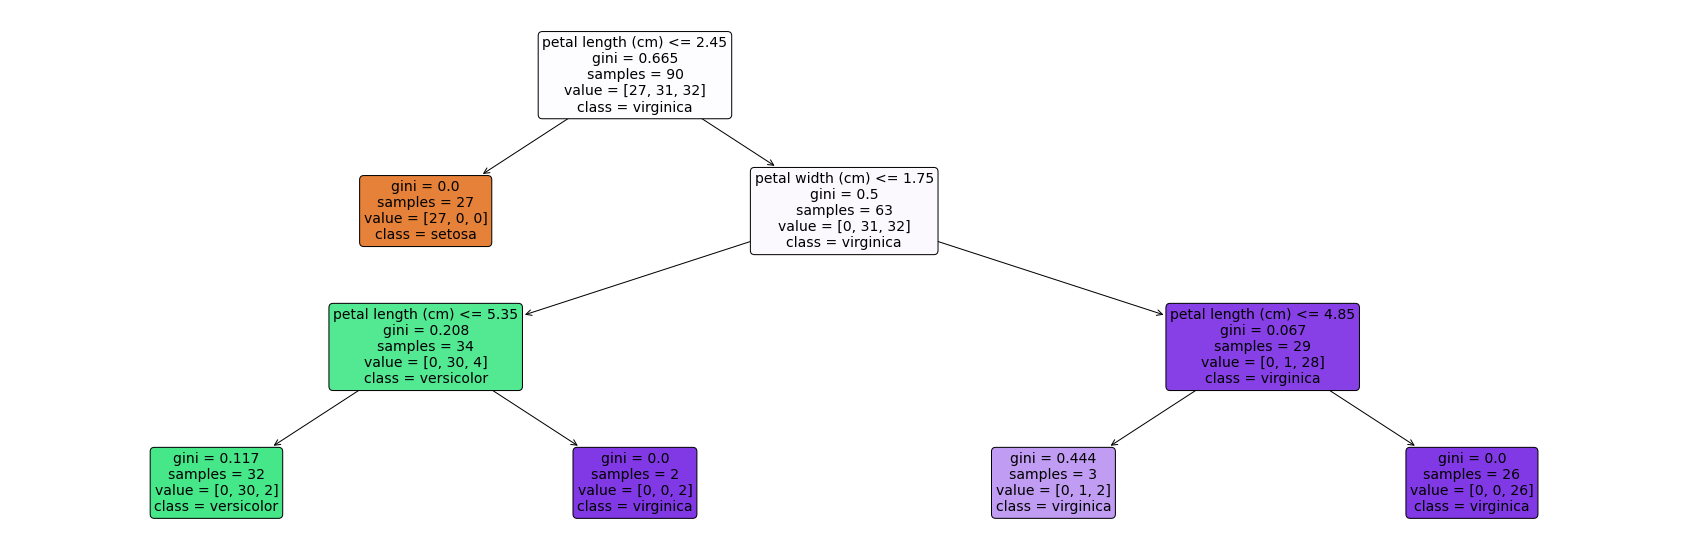

In [18]:
# visualizing how the algorithm behaved
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
# creating the tree plot
a = tree.plot_tree(clf, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=14)
plt.show()

To interpret this graph, we can see that the first split is based on petal length. And it shows that with less than or equal to 2.45cm, it was classified as setosa, while those being higher is virginica. Those with higher than the first condition was then further splitted into two to end up with a more accurate decision

In [25]:
# now test your model on your testing data to see how well it performed
test_pred_decision_tree = clf.predict(X_test)

In [26]:
# now lets see how well it did in terms of predicting the labels using a confusion matrix
from sklearn import metrics
import seaborn as sns

# making the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

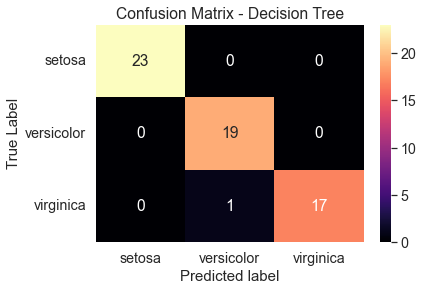

<Figure size 720x504 with 0 Axes>

In [31]:
matrix_df = pd.DataFrame(confusion_matrix)

# plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [32]:
# model evaluation
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [33]:
# it is recommended to do feature importance before modeling, but this is used to calculate
# the importance of each feature
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

             feature  importance
2  petal length (cm)       0.589
3   petal width (cm)       0.411
0  sepal length (cm)       0.000
1   sepal width (cm)       0.000


In [34]:
# improving the model (Hyperparameter Tuning)
# we will use GridSearchCV to see the optimal max_depth

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")



Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 2, 'min_samples_split': 2}

Grid scores on development set:
0.614 (+/-0.210) for {'max_depth': 1, 'min_samples_split': 2}
0.614 (+/-0.210) for {'max_depth': 1, 'min_samples_split': 4}
0.614 (+/-0.210) for {'max_depth': 1, 'min_samples_split': 6}
0.614 (+/-0.210) for {'max_depth': 1, 'min_samples_split': 8}
0.614 (+/-0.210) for {'max_depth': 1, 'min_samples_split': 10}
0.916 (+/-0.194) for {'max_depth': 2, 'min_samples_split': 2}
0.887 (+/-0.177) for {'max_depth': 2, 'min_samples_split': 4}
0.916 (+/-0.194) for {'max_depth': 2, 'min_samples_split': 6}
0.887 (+/-0.177) for {'max_depth': 2, 'min_samples_split': 8}
0.887 (+/-0.177) for {'max_depth': 2, 'min_samples_split': 10}
0.906 (+/-0.179) for {'max_depth': 3, 'min_samples_split': 2}
0.906 (+/-0.179) for {'max_depth': 3, 'min_samples_split': 4}
0.906 (+/-0.179) for {'max_depth': 3, 'min_samples_split': 6}
0.916 (+/-0.183) for {'max_depth': 

Here we can see that the optimal number for max_depth is 2, which has 2 splits. You can now go back to modelling your data using 2 as your max_depth